# Python Programlama Diline Giriş

Python programlama dili, bilgisayardaki herhangi bir işlemi gerçekleştirebileceğiniz bir yüksek seviye (high-level) programlama dilidir. İlk sürümü 1991 yılında ortaya çıkmıştır. Bugün, diğer programlama dillerine kıyasla görece yeni bir programlama dili olmasına rağmen C++ ve Java gibi dilleri geçerek <a href="https://bootcamp.berkeley.edu/blog/most-in-demand-programming-languages/">en çok kullanılan 2. programlama dili olmuştur.</a> Tüm bunlara ek olarak, herhangi bir kullanım ücreti yoktur.

Mühendislik dünyasında sıkça kullanılan MATLAB, kullanıcı dostu olmasının yanında ücretsiz bir yazılım değildir ( eğer bir öğrenci veya akademi hesabınız yoksa). Bu durumda Python dili, güçlü kütüphaneleriyle ve kullanıcı dostu bir programlama dili olmasıyla bugün karşılaşılan birçok mühendislik problemlerinde yoğun bir şekilde kullanılmaktadır.

Aynı şekilde sonlu elemanlar alanında da Python programlama diliyle geliştirilen çok güçlü çözücüler vardır ve geliştirmeleri sürekli devam etmektedir (Örnek: <a href="https://fenicsproject.org/" target="_blank">FEniCSx</a>). Bu derste Python programlama dilinin özelliklerine ve bazı örneklerine değinmek, derslerin anlaşılması açısından faydalı olacaktır.

## Eğitimde Kullanılabilecek Kütüphaneler

Sonlu elemanlar analizlerinde sıklıkla kullanılabilecek kütüphaneler **numpy** (matris, vektör oluşturma), **scipy** (sistem çözümleme) ve **matplotlib** (çözümü görselleştirme) olarak sıralanabilir. 

### Numpy Kütüphanesi

Numpy ile denklem modellemelerinde kullanmak üzere hem vektör hem matrisler oluşturabiliriz. Öncelikle numpy kütüphanesini çağıralım;

In [1]:
import numpy as np

Şimdi 4 Elemandan oluşan bir sıfır vektör oluşturalım;

In [2]:
F = np.zeros(4)

`F` vektörünün İçindeki elemanlara bakmak için print fonksiyonunu kullanabiliriz;

In [3]:
print(F)

[0. 0. 0. 0.]


İstersek herhangi 2 sayı arasında eşit şekilde bölünmüş aralıklardan oluşan bir vektör de tanımlayabiliriz;

In [4]:
L = np.linspace(0,1,10)
print(L)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


Şimdi de 2 boyutlu yapılara giriş olarak 4x4lük sıfırlardan oluşan bir F matrisi oluşturalım; 

In [5]:
K = np.zeros((4,4))
print(K)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Oluşturduğumuz matrisin diyagonal kısmını 1 rakamı ile dolduralım. Bunun için `for` döngüsü kullanabiliriz;

In [6]:
for indis in range(4):
    K[indis][indis] = 1
print(K)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Scipy Kütüphanesi
Scipy kütüphanesi bilimsel araştırmalarda sıklıkla kullanılan fonksiyonları içermektedir. Biz Scipy kütüphanesini oluşturacağımız lineer denklem sistemlerinin çözümü için kullanabiliriz. 

Aşağıdaki 4 bilinmeyenli 4 lineer denklem sistemini düşünelim;

$$a+b+c=70$$ 
$$a+b+d=80$$
$$a+b+d=75$$
$$b+c+d=70$$

Bu sistemi modellemek için yukarıda oluşturduğumuz `F` vektörü ve `K` matrisi kullanabiliriz. Bu durumda yukarıdaki denklem sistemini kısaca `K*u=F`şeklinde de gösterebiliriz. Öncelikle için öncelikle F vektörünü düzenleyelim;

In [7]:
F[0] = 75
F[1] = 80
F[2] = 75
F[3] = 70
print(F)

[75. 80. 75. 70.]


Burada dikkat etmemiz gereken bir husus olarak, Python'da indisler MATLAB'in aksine 1'den değil 0 rakamından başlar. Bu yüzden ilk elemana erişmek için her zaman 0 indisini kullanacağız. 

Şimdi `K` matrisini düzenleyelim. Öncelikle daha önce kısmen 1'lerle doldurduğumuz matrisi tekrar sıfırlayalım; 

In [8]:
K.fill(0)

Birinci denklem olan $$a+b+c=70$$
denkleminin sol tarafını modelleyecek şekilde `K` matrisinin ilk satırını değiştirelim;

In [9]:
K[0][0] = 1
K[0][1] = 1
K[0][2] = 1
K[0][3] = 0

Aynı işlemi diğer denklemler için de yapalım;

In [10]:
# Kare ile başlayan satırlarda bilgisayara işlem yaptırılmaz.
#  Bu (#) sembol satırlar arası yorum yazmak için kullanılabilir.

# İkinci denklem
K[1][0] = 1
K[1][1] = 1
K[1][2] = 0
K[1][3] = 1
# Üçüncü denklem
K[2][0] = 1
K[2][1] = 0
K[2][2] = 1
K[2][3] = 1
# Dördüncü denklem
K[3][0] = 0
K[3][1] = 1
K[3][2] = 1
K[3][3] = 1
print(K)

[[1. 1. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 1.]
 [0. 1. 1. 1.]]


Artık denklem sistemini çözebiliriz. Bunun için scipy kütüphanesindeki <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html"> scipy.linalg.solve() </a> fonksiyonunu kullanabiliriz. Bunun için ilk önce fonksiyonu çağıralım; 

In [11]:
from scipy.linalg import solve

Çözüm vektörümüz `u` olsun. Şimdi matrisleri fonksiyonun içine yerleştirip çözümü elde edebiliriz;

In [12]:
u = solve(K,F)
print(u)

[30. 25. 20. 25.]


`u` vektörünün elemanları sırasıyla `a,b,c ve d` bilinmeyenlerini göstermektedir. Bulunan değerleri yerine koyarak çözümü kontrol edebilirsiniz.

### Matplotlib Kütüphanesi

Matplotlib kütüphanesi bir çok veriyi kolayca anlamak için kullanılabilecek, Python dilindeki kütüphanedir. Bu kütüphane sayesinde küçük-orta ölçekteki bir çok veriyi görselleştirebiliriz. 

Basit bir örnek ile bu kütüphanenin kullanımını uygulamaya dönüştürelim. Yüksekliği h, yarıçapı r olan bir silindirin haciminin denklemini yazalım;

$$V = \pi r^2 h$$

Yüksekliği h=1m olan bir silindirin, hacminin r=0.1m ve r=0.9m aralığı için alacağı değerleri grafikle daha kolay yorumlayabiliriz. 

Öncelikle her zamanki gibi matplotlib kütüphanesini çağıralım;

In [13]:
import matplotlib.pyplot as plt

Şimdi değişkenlerimizi tanımlayalım;

In [14]:
h = 1 
r = np.linspace(0.1,0.9)

Silindirin hacmini farklı yarıçap ve yükseklik değerleri için hesaplamak için Python fonksiyonları çok kullanışlıdır. Şimdi bu fonksiyonu yazalım;

In [15]:
def hacim(h,r):
    return np.pi*r**2*h

Şimdi bütün hacim değerlerini yukarıdaki fonksiyon ile hesaplayabiliriz;

In [16]:
hacimler = hacim(h,r)
print(hacimler)

[0.03141593 0.0425116  0.05528209 0.06972739 0.08584752 0.10364246
 0.12311223 0.14425681 0.1670762  0.19157042 0.21773946 0.24558331
 0.27510198 0.30629547 0.33916378 0.3737069  0.40992485 0.44781761
 0.48738519 0.52862759 0.57154481 0.61613684 0.6624037  0.71034537
 0.75996186 0.81125317 0.8642193  0.91886024 0.97517601 1.03316659
 1.09283199 1.1541722  1.21718724 1.2818771  1.34824177 1.41628126
 1.48599557 1.5573847  1.63044864 1.70518741 1.78160099 1.85968939
 1.93945261 2.02089064 2.1040035  2.18879117 2.27525366 2.36339097
 2.4532031  2.54469005]


Görüldüğü üzere yukarıdaki veriyi yorumlamak kolay değildir. Burada matplotlib fonksiyonlarının ne kadar kullanışlı olduğunu gösterelim;

Text(0, 0.5, 'Hacim($m^3$)')

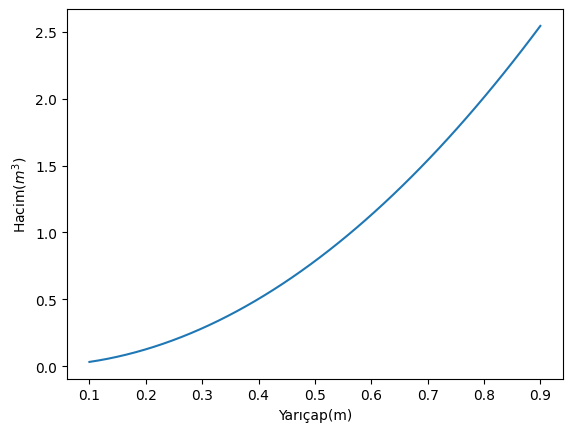

In [17]:
plt.plot(r,hacimler)
plt.xlabel("Yarıçap(m)")
plt.ylabel(r"Hacim($m^3$)")

Ürettiğimiz grafiğe bakarak 0.1m ve 0.9m arasındaki herhangi bir yarıçap değeri için yeni hacim hakkında kolayca bilgi sahibi olabiliriz.

Farklı yükseklik ve yarıçap değerleri için de 2 boyutlu grafikleri kullanabiliriz. Bunun için h=0.1m ve h=0.9m aralığındaki değerlerden oluşan bir yükseklik dizisi oluşturalım;

In [18]:
h = np.linspace(0.1,0.9)

2 boyutlu grafik oluşturacağımız için 2 boyutlu yükseklik ve yarıçap dizileri oluşturmamız gerekiyor. Bu sebeple <a href="https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html"> np.meshgrid </a>  fonksiyonunu kullanabiliriz;

In [19]:
HH,RR = np.meshgrid(h,r)

Şimdi tekrar 2 boyutlu hacimleri hesaplayalım;

In [20]:
hacimler2 = hacim(HH,RR)

Artık 2 boyutlu grafik için tüm verilerimiz hazır, grafiği <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html"> contourf()</a> fonksiyonunu kullanarak oluşturalım;

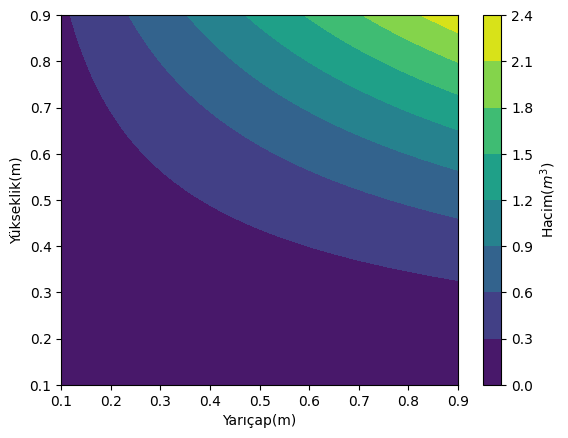

In [21]:
plt.contourf(HH,RR,hacimler2)
plt.xlabel("Yarıçap(m)")
plt.ylabel("Yükseklik(m)")
plt.colorbar(label=r"Hacim($m^3$)")

Grafiği biraz daha hassas hale getirelim. Bunun için `hassasiyet` adında bir değişken ekleyip contourf() fonksiyonun içine ekleyebiliriz;

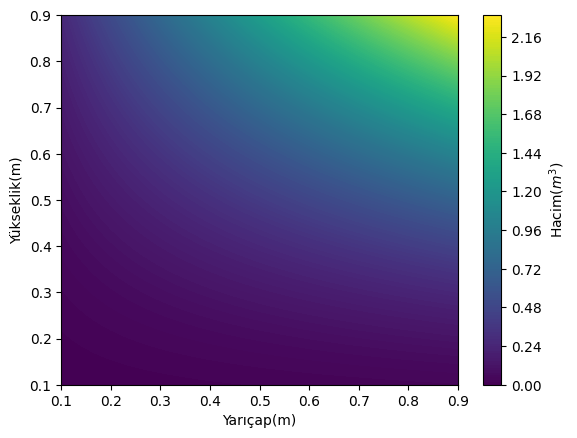

In [22]:
hassasiyet = 200
plt.contourf(HH,RR,hacimler2,hassasiyet)
plt.xlabel("Yarıçap(m)")
plt.ylabel("Yükseklik(m)")
plt.colorbar(label=r"Hacim($m^3$)")

Bu grafiği daha da anlaşılır hale getirmek için farklı bir renk paleti (colormap) kullanabiliriz. Bunun için colormap kütüphanesini çağıralım;

In [23]:
from matplotlib import cm

Şimdi <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html"> renk paletleri</a> arasından `hsv`'yi seçelim; 

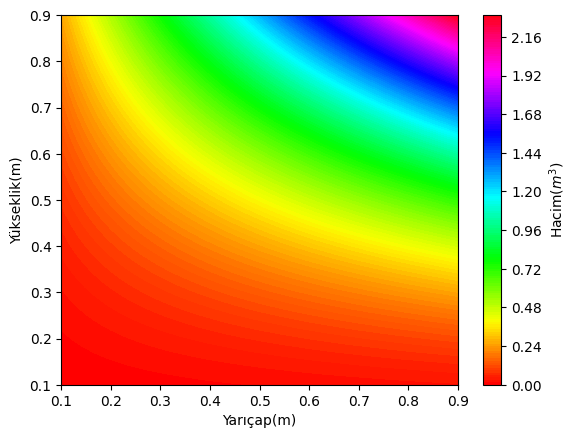

In [24]:
plt.contourf(HH,RR,hacimler2,hassasiyet,cmap="hsv")
plt.xlabel("Yarıçap(m)")
plt.ylabel("Yükseklik(m)")
plt.colorbar(label=r"Hacim($m^3$)")

Burada sonlu elemanlar eğitimimiz için gerekli tüm Python programlama bilgisini özetlemiş olduk. Artık derslerimize geçebiliriz.